<a href="https://colab.research.google.com/github/sharjeelanjum/Deeplearning_with_pytorch/blob/main/On_the_second_day_of_your_job%2C_you_are_asked_to_invesQgate_a_small_dataset_of_the_company%E2%80%99s_products_and_corresponding_quality_levels%2C_with_Green_being_good%2C_Red_denoQng_faulty%2C_and_Orange_being_a_borderline_case_Implement_and_evaluate_simple_machine_l.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

It includes all steps mentioned in the below question

**Question:**
On the second day of your job, you are asked to invesQgate a small dataset of the company’s products and corresponding quality levels, with Green being good, Red denoQng faulty, and Orange being a borderline case. Implement and evaluate simple machine learning classificaQon models – logisQc regression and soamax regression. For the logisQc regression (binary classificaQon problem) consider only the following split – Orange instances against the rest of the dataset.


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, log_loss
from sklearn.model_selection import train_test_split

x1 = [1, 4, 2.5, 5, 0, 2.3, 5, 1.4, 1.2, 3.9]
x2 = [10.5, 2, 4, 0.8, 1.5, 4, 2, 3, 5.2, 4.6]
y = ["green", "orange", "orange", "red", "green", "green", "orange", "green", "green", "green"]

X = np.array([x1, x2]).T
y_binary = [1 if i == 'orange' else 0 for i in y]

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.2, random_state=42)
clf_binary = LogisticRegression().fit(X_train_bin, y_train_bin)
print(f"Binary Classification Report:\n{classification_report(y_test_bin, clf_binary.predict(X_test_bin))}")

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y, test_size=0.2, random_state=42)
clf_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(X_train_multi, y_train_multi)
print(f"\nMulti Classification Report:\n{classification_report(y_test_multi, clf_multi.predict(X_test_multi))}")

print(f"\nBinary Classification Accuracy for Whole Dataset: {accuracy_score(y_binary, clf_binary.predict(X)) * 100:.2f}%")
print(f"Binary Cross-Entropy Loss for Whole Dataset: {log_loss(y_binary, clf_binary.predict_proba(X)[:, 1]):.4f}")


Binary Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


Multi Classification Report:
              precision    recall  f1-score   support

       green       1.00      1.00      1.00         1
      orange       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Binary Classification Accuracy for Whole Dataset: 70.00%
Binary Cross-Entropy Loss for Whole Dataset: 0.5135


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Parameters after GD: [ 0.43500817 -0.78370834  0.36725949]
Parameters after SGD: [ 1.54065632 -0.97087632  0.19652964]


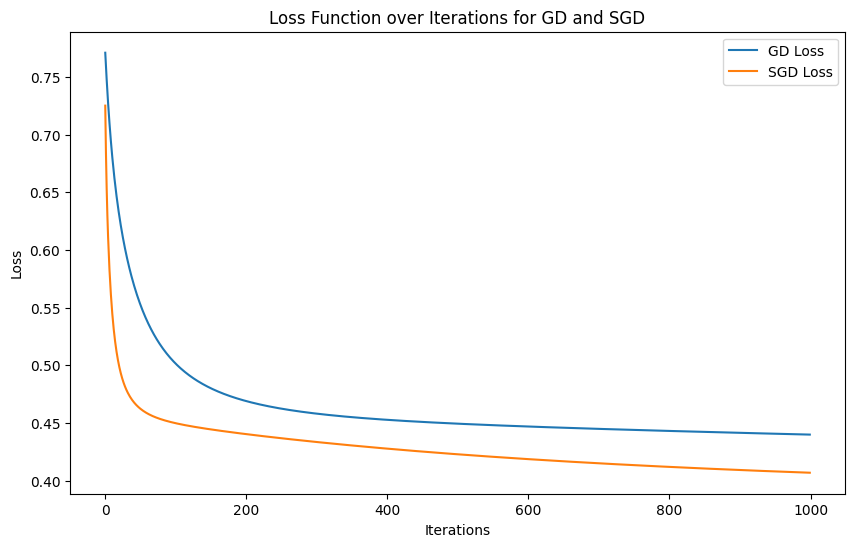

Time taken for GD: 1.6492013931274414
Time taken for SGD: 0.9073681831359863

Confusion matrix for GD:
 [[4 1]
 [1 4]]

Confusion matrix for SGD:
 [[4 1]
 [1 4]]


In [ ]:

from sklearn.metrics import f1_score, confusion_matrix
import time
import matplotlib.pyplot as plt



X = np.array([x1, x2]).T
X = np.hstack((np.ones((X.shape[0], 1)), X))
y_binary = np.array([1 if i == 'orange' else 0 for i in y])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    return (-1/m) * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h)))

def compute_gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    return (1/m) * X.T.dot(h - y)

losses_gd, f1_scores_gd = [], []
losses_sgd, f1_scores_sgd = [], []

# GD
alpha = 0.01
iterations = 1000
theta_gd = np.array([0.1, 0.1, 0.1])

start_time = time.time()
for _ in range(iterations):
    gradient = compute_gradient(theta_gd, X, y_binary)
    theta_gd -= alpha * gradient
    losses_gd.append(compute_loss(theta_gd, X, y_binary))
    y_pred = (sigmoid(X.dot(theta_gd)) >= 0.5).astype(int)
    f1_scores_gd.append(f1_score(y_binary, y_pred))

gd_time = time.time() - start_time
print("Parameters after GD:", theta_gd)

theta_sgd = np.array([0.1, 0.1, 0.1])

start_time = time.time()
for _ in range(iterations):
    for i in range(0, len(y_binary), 2):
        X_batch = X[i:i+2]
        y_batch = y_binary[i:i+2]
        gradient = compute_gradient(theta_sgd, X_batch, y_batch)
        theta_sgd -= alpha * gradient
    losses_sgd.append(compute_loss(theta_sgd, X, y_binary))
    y_pred = (sigmoid(X.dot(theta_sgd)) >= 0.5).astype(int)
    f1_scores_sgd.append(f1_score(y_binary, y_pred))

sgd_time = time.time() - start_time
print("Parameters after SGD:", theta_sgd)

plt.figure(figsize=(10,6))
plt.plot(losses_gd, label="GD Loss")
plt.plot(losses_sgd, label="SGD Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Function over Iterations for GD and SGD")
plt.legend()
plt.show()

print("Time taken for GD:", gd_time)
print("Time taken for SGD:", sgd_time)


y_pred_gd = (sigmoid(X.dot(theta_gd)) >= 0.5).astype(int)
y_pred_sgd = (sigmoid(X.dot(theta_sgd)) >= 0.5).astype(int)

confusion_gd = confusion_matrix(y_binary, y_pred_gd)
confusion_sgd = confusion_matrix(y_binary, y_pred_sgd)

print("\nConfusion matrix for GD:\n", confusion_gd)
print("\nConfusion matrix for SGD:\n", confusion_sgd)


The above graphs illustrate that the GD loss is much higher at initial iterations and decreasing over the iterations.However, the SGD is less than the GD in initial iterations and also has low loss overall.

**Question**


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


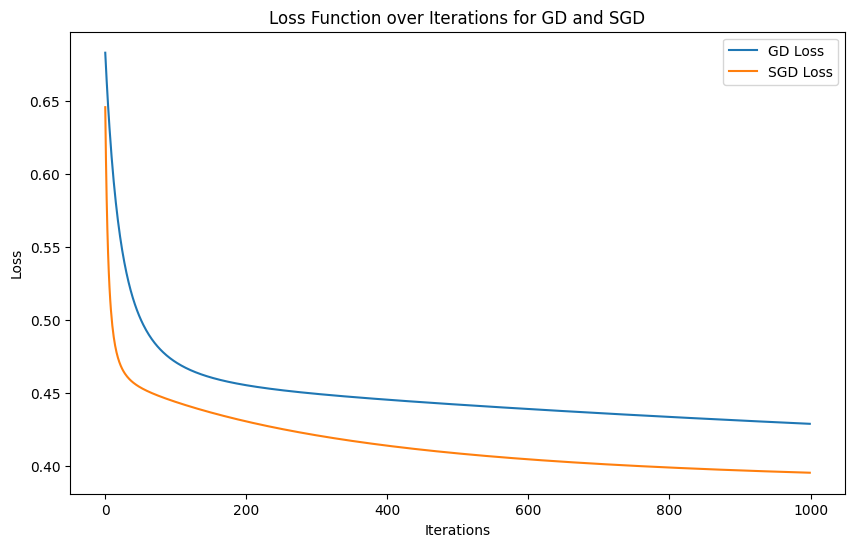

Time taken for GD: 1.2166848182678223
Time taken for SGD: 0.9211015701293945

Confusion matrix for GD:
 [[4 1]
 [1 4]]

Confusion matrix for SGD:
 [[4 1]
 [1 4]]


In [ ]:
from sklearn.preprocessing import OneHotEncoder

X = np.array([x1, x2]).T
X = np.hstack((np.ones((X.shape[0], 1)), X))
y_binary = np.array([1 if i == 'orange' else 0 for i in y])
# One-hot encoding
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(np.array(y).reshape(-1, 1))

def softmax(z):
    exp_z = np.exp(z - np.max(z))
    return exp_z / exp_z.sum(axis=1, keepdims=True)

def compute_loss(theta, X, y_onehot):
    m = len(y_onehot)
    logits = X.dot(theta)
    probs = softmax(logits)
    loss = -np.sum(y_onehot * np.log(probs + 1e-7)) / m
    return loss

def compute_gradient(theta, X, y_onehot):
    m = len(y_onehot)
    logits = X.dot(theta)
    probs = softmax(logits)
    return (1/m) * X.T.dot(probs - y_onehot)


alpha = 0.01
iterations = 1000
n_features = X.shape[1]
n_classes = y_onehot.shape[1]

theta_gd = np.ones((n_features, n_classes)) * 0.1
theta_sgd = np.ones((n_features, n_classes)) * 0.1

losses_gd, f1_scores_gd = [], []
losses_sgd, f1_scores_sgd = [], []

# GD
start_time = time.time()
for _ in range(iterations):
    gradient = compute_gradient(theta_gd, X, y_onehot)
    theta_gd -= alpha * gradient
    losses_gd.append(compute_loss(theta_gd, X, y_onehot))
    y_pred = np.argmax(softmax(X.dot(theta_gd)), axis=1)
    f1_scores_gd.append(f1_score(y_pred, np.argmax(y_onehot, axis=1), average='macro'))

gd_time = time.time() - start_time

# SGD
start_time = time.time()
for _ in range(iterations):
    for i in range(0, len(y_onehot), 2):
        X_batch = X[i:i+2]
        y_batch = y_onehot[i:i+2]
        gradient = compute_gradient(theta_sgd, X_batch, y_batch)
        theta_sgd -= alpha * gradient
    losses_sgd.append(compute_loss(theta_sgd, X, y_onehot))
    y_pred = np.argmax(softmax(X.dot(theta_sgd)), axis=1)
    f1_scores_sgd.append(f1_score(y_pred, np.argmax(y_onehot, axis=1), average='macro'))

sgd_time = time.time() - start_time

# Plot
plt.figure(figsize=(10,6))
plt.plot(losses_gd, label="GD Loss")
plt.plot(losses_sgd, label="SGD Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Function over Iterations for GD and SGD")
plt.legend()
plt.show()

print("Time taken for GD:", gd_time)
print("Time taken for SGD:", sgd_time)

y_pred_gd = np.argmax(softmax(X.dot(theta_gd)), axis=1)
y_pred_sgd = np.argmax(softmax(X.dot(theta_sgd)), axis=1)
confusion_gd = confusion_matrix(np.argmax(y_onehot, axis=1), y_pred_gd)
confusion_sgd = confusion_matrix(np.argmax(y_onehot, axis=1), y_pred_sgd)

print("\nConfusion matrix for GD:\n", confusion_gd)
print("\nConfusion matrix for SGD:\n", confusion_sgd)
